# 📊 Análisis Exploratorio de Ventas
Este notebook analiza un conjunto de datos de ventas simuladas para obtener insights útiles.

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones generales
sns.set(style='whitegrid')
%matplotlib inline

In [3]:
# Cargar dataset
df = pd.read_csv('../data/ventas.csv')
df.head()

,Fecha,Producto,Cliente,Cantidad,Precio Unitario,Total
0,2024-01-01,Carpa,Empresa A,7,407,2849
1,2024-01-02,Luces,Particular X,8,457,3656
2,2024-01-03,Altavoz,Empresa A,4,205,820
3,2024-01-04,Luces,Empresa A,2,422,844
4,2024-01-05,Luces,Empresa B,3,57,171


In [4]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Fecha            200 non-null    object
 1   Producto         200 non-null    object
 2   Cliente          200 non-null    object
 3   Cantidad         200 non-null    int64 
 4   Precio Unitario  200 non-null    int64 
 5   Total            200 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.5+ KB


In [5]:
# Estadísticas descriptivas
df.describe()

,Cantidad,Precio Unitario,Total
count,200.000000,200.000000,200.000000
mean,4.880000,281.900000,1342.610000
std,2.576586,129.238434,954.956621
min,1.000000,50.000000,88.000000
25%,3.000000,170.250000,520.500000
50%,5.000000,288.500000,1135.500000
75%,7.000000,396.250000,2016.750000
max,9.000000,499.000000,4464.000000


## 🛍️ Productos más vendidos

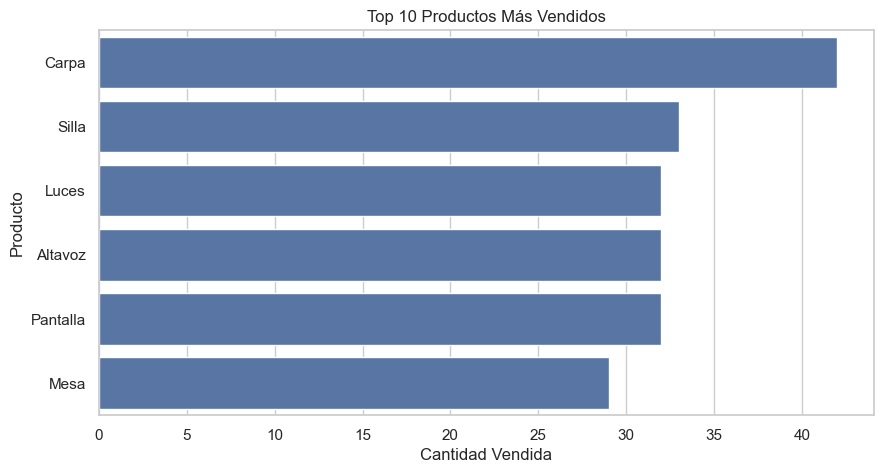

In [6]:
productos_mas_vendidos = df['Producto'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=productos_mas_vendidos.values, y=productos_mas_vendidos.index)
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.show()

## 💰 Ingresos totales por mes

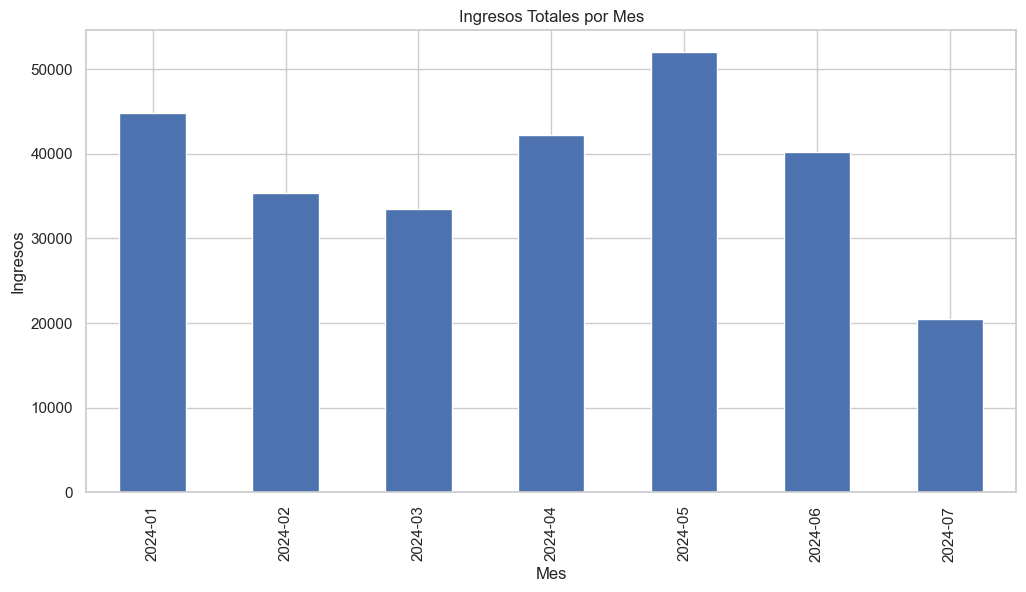

In [7]:
# Asegurarse de que la columna Fecha esté en formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Mes'] = df['Fecha'].dt.to_period('M')
ingresos_mensuales = df.groupby('Mes')['Total'].sum()
ingresos_mensuales.plot(kind='bar', figsize=(12,6), title='Ingresos Totales por Mes')
plt.ylabel('Ingresos')
plt.show()

## 👥 Clientes más rentables

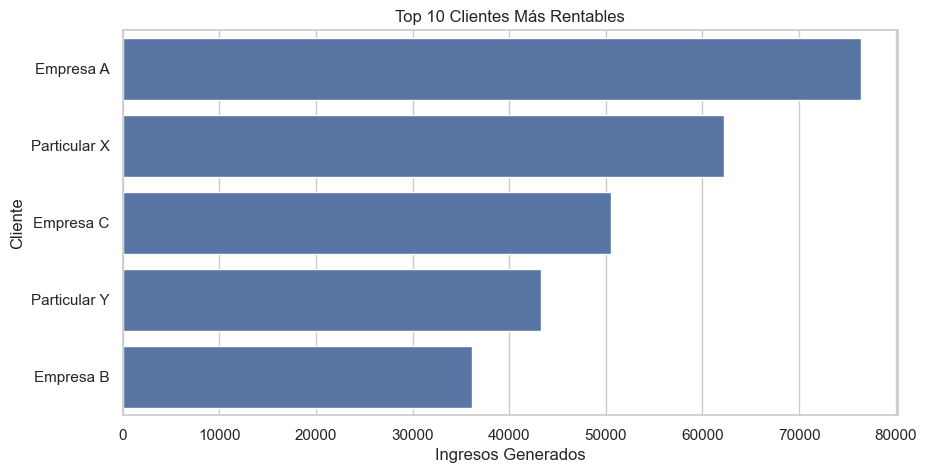

In [8]:
clientes_rentables = df.groupby('Cliente')['Total'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=clientes_rentables.values, y=clientes_rentables.index)
plt.title('Top 10 Clientes Más Rentables')
plt.xlabel('Ingresos Generados')
plt.ylabel('Cliente')
plt.show()

## 📅 Días con más ventas

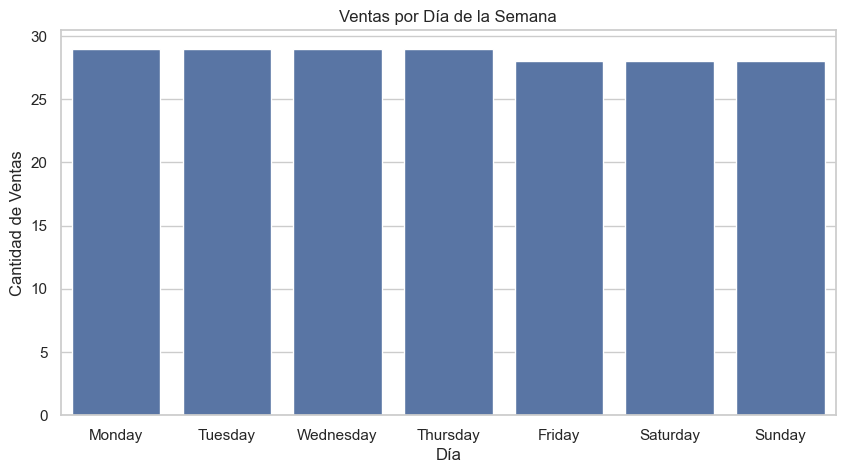

In [9]:
df['Día'] = df['Fecha'].dt.day_name()
ventas_por_dia = df['Día'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=ventas_por_dia.index, y=ventas_por_dia.values)
plt.title('Ventas por Día de la Semana')
plt.xlabel('Día')
plt.ylabel('Cantidad de Ventas')
plt.show()

## ✅ Conclusiones
- Analiza los gráficos generados para extraer insights.
- Piensa en acciones que se podrían tomar con base en los resultados.